# Modeling TCLab

Alex Dowling, University of Notre Dame

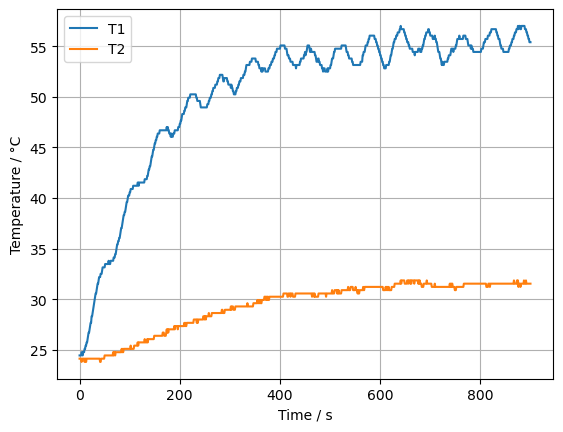

In [5]:
from FoKL import FoKLRoutines
import numpy as np
import pyomo.environ as pyo
import pandas as pd
import matplotlib.pyplot as plt

filename = 'tclab_sine_test.csv'

data = pd.read_csv(filename)
data.plot(x='Time', y=['T1', 'T2'], grid=True, xlabel='Time / s', ylabel='Temperature / °C')
plt.show()

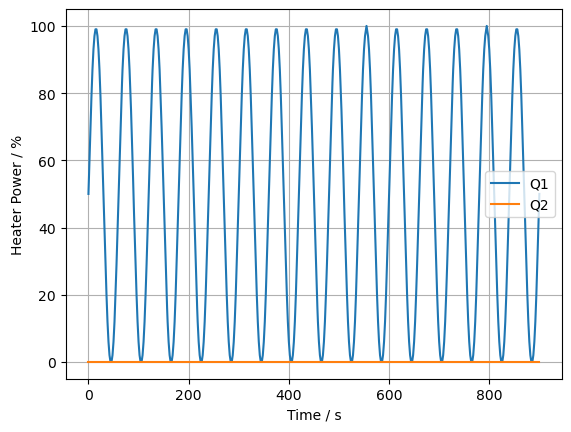

In [6]:
data.plot(x='Time', y=['Q1', 'Q2'], grid=True, xlabel='Time / s', ylabel='Heater Power / %')
plt.show()

We want to train the following mathematical model:

$$
\frac{dT_1}{dt} = f(T_1, Q_1)
$$

where $f(\cdot, \cdot)$ is the GP.

In [25]:
dT1dt = np.gradient(data['T1'], data['Time'])
print("length of derivative vector: ", len(dT1dt))

T1 = data['T1'].values
Tamb = T1[0]
T1 = T1 - Tamb

print("length of T1 vector: ", len(T1))


u1 = data['Q1'].values
print("length of u1 vector: ", len(u1))

t = data['Time'].values
print("length of time vector: ", len(t))

length of derivative vector:  901
length of T1 vector:  901
length of u1 vector:  901
length of time vector:  901


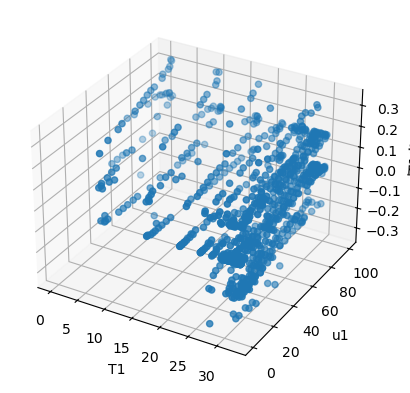

In [26]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(T1, u1, dT1dt)
ax.set_xlabel('T1')
ax.set_ylabel('u1')
ax.set_zlabel('dT1dt')
plt.show()

## Attempt 1

In [27]:
f = FoKLRoutines.FoKL(kernel=1, UserWarnings=False)
print("\nTraining FoKL model...")
f.fit([T1, u1], dT1dt, clean=True)
print("Done!")
f.save('attempt1.fokl')


Training FoKL model...
[1, -2839.4896093757693]
[2, -2833.0338525133097]
[2, -2827.854811730512]
[3, -2821.6781900675896]
Done!


'attempt1.fokl'

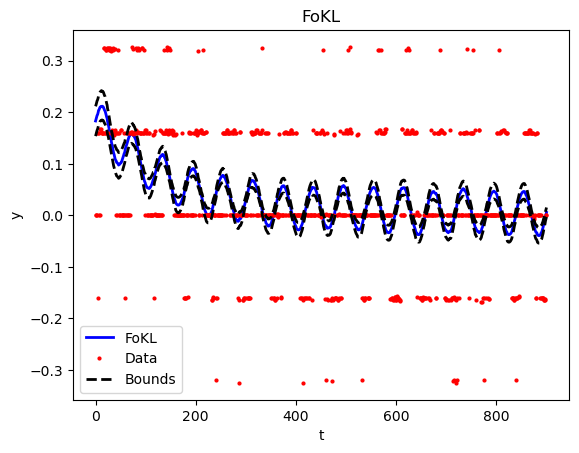

(array([ 1.83102019e-01,  1.86674230e-01,  1.90246441e-01,  1.93818652e-01,
         1.95556745e-01,  1.99128957e-01,  2.03820843e-01,  2.04844494e-01,
         2.07702263e-01,  2.09845590e-01,  2.10097483e-01,  2.11526367e-01,
         2.11121134e-01,  2.11835576e-01,  2.10715900e-01,  2.10715900e-01,
         2.08881783e-01,  2.06275906e-01,  2.03727346e-01,  2.02298462e-01,
         1.99035460e-01,  1.95058015e-01,  1.91080571e-01,  1.88222802e-01,
         1.81639481e-01,  1.78067270e-01,  1.73375383e-01,  1.67969054e-01,
         1.62505409e-01,  1.57099080e-01,  1.51692751e-01,  1.45571980e-01,
         1.40165651e-01,  1.36593440e-01,  1.31129795e-01,  1.25723466e-01,
         1.21031579e-01,  1.18173810e-01,  1.13481923e-01,  1.09447163e-01,
         1.07303836e-01,  1.05874952e-01,  1.02611949e-01,  1.01897507e-01,
         1.01183065e-01,  9.93489470e-02,  9.75148292e-02,  9.82292714e-02,
         9.89437136e-02,  1.00372598e-01,  1.01801483e-01,  1.02053375e-01,
         1.0

In [28]:
# Plot to visualize dataset and model:
f.coverage3(plot=True, xlabel='t', xaxis=t, ylabel='y')

## Attempt 2

In [29]:
f = FoKLRoutines.FoKL(kernel=1, UserWarnings=False)
print("\nTraining FoKL model...")
f.fit([u1], T1, clean=True)
print("Done!")
f.save('attempt2.fokl')


Training FoKL model...
[1, 4522.402087285794]
[2, 4522.402087285794]
[3, 4522.402087285794]
[4, 4522.402087285794]
Done!


'attempt2.fokl'

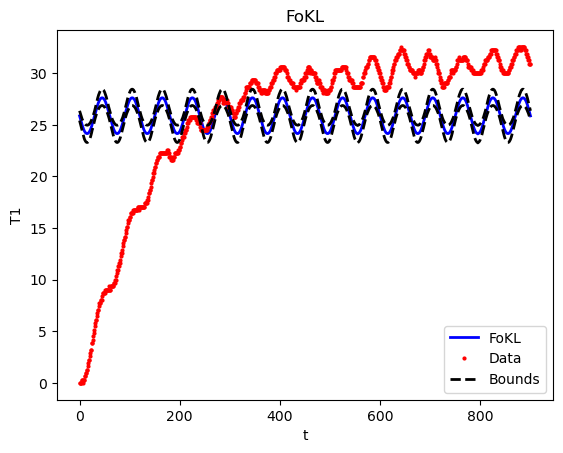

(array([25.86956987, 25.69484813, 25.52012639, 25.34540466, 25.17068292,
        24.99596119, 24.8561838 , 24.71640641, 24.57662902, 24.47179598,
        24.36696294, 24.29707425, 24.22718555, 24.19224121, 24.15729686,
        24.15729686, 24.15729686, 24.19224121, 24.22718555, 24.29707425,
        24.36696294, 24.47179598, 24.57662902, 24.71640641, 24.8561838 ,
        25.03090554, 25.17068292, 25.34540466, 25.52012639, 25.69484813,
        25.86956987, 26.07923595, 26.25395768, 26.42867942, 26.60340115,
        26.77812289, 26.91790028, 27.05767767, 27.19745506, 27.3022881 ,
        27.40712114, 27.47700983, 27.54689853, 27.58184287, 27.61678722,
        27.61678722, 27.61678722, 27.58184287, 27.54689853, 27.47700983,
        27.40712114, 27.3022881 , 27.19745506, 27.05767767, 26.91790028,
        26.74317854, 26.60340115, 26.42867942, 26.25395768, 26.07923595,
        25.86956987, 25.69484813, 25.52012639, 25.34540466, 25.17068292,
        24.99596119, 24.8561838 , 24.71640641, 24.5

In [30]:
# Plot to visualize dataset and model:
f.coverage3(plot=True, xlabel='t', xaxis=t, ylabel='T1')